install packages

In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn joblib 

Note: you may need to restart the kernel to use updated packages.


🔹 1. Chargement des données

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



1.Importer le fichier CSV à l’aide de Pandas avec pandas.read_csv().  


In [5]:


df = pd.read_csv('appartements-data-db-6872f0ba853ec096170787.csv')

Utiliser df.info() pour voir le type de chaque colonne.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB
None


Utiliser df.head() pour voir les premières lignes.

In [7]:
print(df.head())

                                               title         price  \
0       CMN-MA-1752 - Appartement à vendre à Palmier  2 000 000 DH   
1  66370-Vente Appt à Casablanca Hay Hassani de 1...  1 195 000 DH   
2           Appartement à vendre 81 m² à Dar Bouazza  1 350 000 DH   
3  63860-Vente Appt à Casablanca Quartier Bd Med ...    900 000 DH   
4                          Appartement à Rabat Agdal  3 100 000 DH   

     city_name  salon  nb_rooms  nb_baths  surface_area  \
0   Casablanca    NaN       2.0       2.0         168.0   
1   Casablanca    NaN       2.0       2.0          98.0   
2  Dar Bouazza    1.0       2.0       2.0          81.0   
3   Casablanca    NaN       1.0       1.0          56.0   
4        Rabat    2.0       3.0       2.0         200.0   

                                           equipment  \
0                  Ascenseur/Balcon/Parking/Terrasse   
1  Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...   
2  Ascenseur/Balcon/Chauffage/Climatisation/Conci...   


🔹 2. Analyse Exploratoire des Données (EDA)

Afficher les dimensions et types des données : df.shape, df.dtypes.


In [8]:
df.shape

(1773, 9)

In [9]:
df.dtypes

title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object

Rechercher les valeurs manquantes avec df.isnull().sum().

In [10]:
data_nul = df.isna()
print(df.isna().sum())
print(data_nul)

title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64
      title  price  city_name  salon  nb_rooms  nb_baths  surface_area  \
0     False  False      False   True     False     False         False   
1     False  False      False   True     False     False         False   
2     False  False      False  False     False     False         False   
3     False  False      False   True     False     False         False   
4     False  False      False  False     False     False         False   
...     ...    ...        ...    ...       ...       ...           ...   
1768  False   True      False  False      True      True         False   
1769  False   True      False  False      True      True         False   
1770  False   True      False  False      True      True         False   
1771  False  False      False  False     False     False         Fa

Détecter les doublons

In [11]:
print("Nombre total de doublons:" ,df.duplicated().sum())

Nombre total de doublons: 41


Analyser la distribution des colonnes numériques

array([[<Axes: title={'center': 'salon'}>,
        <Axes: title={'center': 'nb_rooms'}>],
       [<Axes: title={'center': 'nb_baths'}>,
        <Axes: title={'center': 'surface_area'}>]], dtype=object)

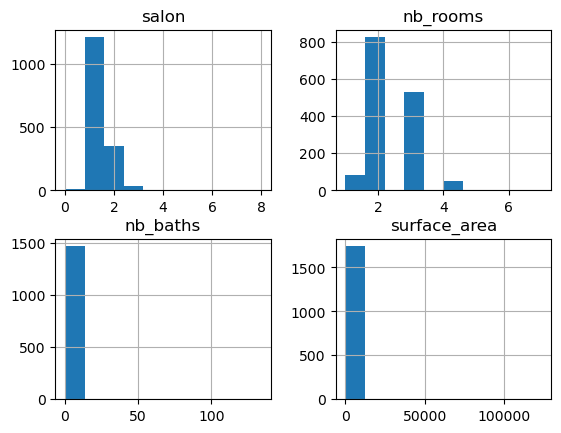

In [12]:
df.hist()

Étudier les corrélations

In [13]:
df.corr

<bound method DataFrame.corr of                                                   title         price  \
0          CMN-MA-1752 - Appartement à vendre à Palmier  2 000 000 DH   
1     66370-Vente Appt à Casablanca Hay Hassani de 1...  1 195 000 DH   
2              Appartement à vendre 81 m² à Dar Bouazza  1 350 000 DH   
3     63860-Vente Appt à Casablanca Quartier Bd Med ...    900 000 DH   
4                             Appartement à Rabat Agdal  3 100 000 DH   
...                                                 ...           ...   
1768                Appartement à vendre 62 m² à Agadir           NaN   
1769                        Appartement 110 m² à Agadir           NaN   
1770             Appartement à vendre 12000 m² à Temara           NaN   
1771                      appartement de 84 m² à vendre    700 000 DH   
1772                 Appartement Neuf à vendre à Temara  1 200 000 DH   

        city_name  salon  nb_rooms  nb_baths  surface_area  \
0      Casablanca    NaN     

3. Prétraitement des données

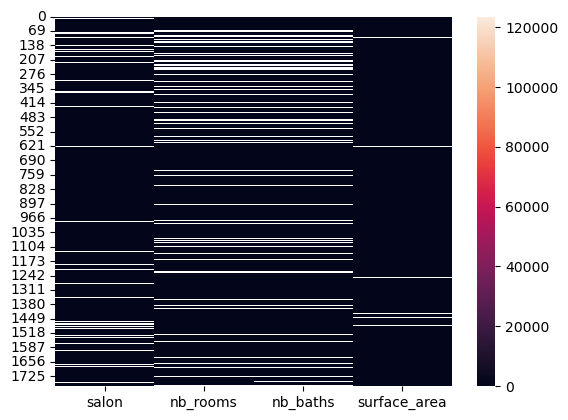

In [14]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df)

plt.show()

✅ Nettoyage & Transformation

Extraire les équipements (equipment) avec str.get_dummies() ➝ nouvelles colonnes booléennes.

In [15]:
equipments_dummies = df['equipment'].str.get_dummies(sep="/")
df = pd.concat([df, equipments_dummies], axis=1)
print(equipments_dummies)

      Ascenseur  Balcon  Chauffage  Climatisation  Concierge  Cuisine Équipée  \
0             1       1          0              0          0                0   
1             1       1          1              1          0                1   
2             1       1          1              1          1                1   
3             1       0          1              1          0                1   
4             1       1          0              0          1                0   
...         ...     ...        ...            ...        ...              ...   
1768          1       1          0              0          0                1   
1769          1       0          0              0          0                0   
1770          1       1          0              0          0                0   
1771          0       0          0              0          0                1   
1772          1       1          0              1          1                1   

      Duplex  Meublé  Parki

In [16]:

df['price'] = (
    df['price']
    .astype(str)
    .str.replace(r'[^\d,]', '', regex=True)   
    .str.replace(',', '.', 1)                 
    .str.replace(',', '')                     
)

df['price'] = df['price'].replace('', np.nan)
df['price'] = df['price'].astype(float)



In [17]:
print(df['price'].head())

0    2000000.0
1    1195000.0
2    1350000.0
3     900000.0
4    3100000.0
Name: price, dtype: float64


Supprimer les colonnes inutiles (equipment, link)

In [18]:
df.drop(columns=['equipment', 'link'], inplace=True)


In [19]:
print(list(df.columns))

['title', 'price', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']


Uniformiser les noms de ville (arabe → français)

In [20]:
city_mapping = {
    "الدار البيضاء": "Casablanca",
    "الرباط": "Rabat",
    "القنيطرة": "Kénitra",
    "مراكش": "Marrakech",
    "أكادير": "Agadir",
    "المحمدية": "Mohammedia",
    "طنجة":"Tanger"
}


df['city_name'] = df['city_name'].replace(city_mapping)
print(df['city_name'].unique())

['Casablanca' 'Dar Bouazza' 'Rabat' 'Marrakech' 'Asilah' 'Bouskoura'
 'Kénitra' 'Mohammedia' 'Agadir' 'Tamesna' 'Salé' 'Had Soualem' 'Temara'
 'Benslimane' 'Tanger' 'Bouznika' 'Meknès' 'Fès' 'El Jadida'
 'El Mansouria' 'Martil' 'Fnideq' 'Tétouan' 'Saidia' 'Nouaceur' 'Tamaris'
 'Cabo Negro' 'Sidi Allal El Bahraoui' 'Béni Mellal' nan 'Essaouira'
 'Mehdia' 'Oujda' 'Oued Laou' 'Dcheira' 'Sidi Rahal' 'Deroua' 'Ain Attig'
 'Safi' 'Inzegan' 'Ifrane' 'Dakhla' 'Dcheïra El Jihadia' 'Taghazout'
 'Sidi Bouknadel' 'Skhirat' 'Khouribga' 'Berkane' 'Mers El Kheir'
 'Berrechid' 'Tiznit' 'Agadir Melloul' 'Nador' 'El Menzeh' 'Bni Ansar'
 'Mdiq' 'Tit Mellil' 'Souk El Arbaa' 'Biougra' 'Settat' 'Ain Aouda' 'Taza'
 'Khemisset' 'Oued Zem' 'Sefrou' 'Merzouga' 'El Hajeb' 'Selouane'
 'Taounate' 'Sidi Bennour' 'El Ksiba']


Remplacer les valeurs manquantes dans city_name par "Unknown".

In [21]:
df['city_name'] = df['city_name'].fillna("Unknown")

In [22]:
print(df['city_name'].isna().sum())
print(df['city_name'].unique()) 

0
['Casablanca' 'Dar Bouazza' 'Rabat' 'Marrakech' 'Asilah' 'Bouskoura'
 'Kénitra' 'Mohammedia' 'Agadir' 'Tamesna' 'Salé' 'Had Soualem' 'Temara'
 'Benslimane' 'Tanger' 'Bouznika' 'Meknès' 'Fès' 'El Jadida'
 'El Mansouria' 'Martil' 'Fnideq' 'Tétouan' 'Saidia' 'Nouaceur' 'Tamaris'
 'Cabo Negro' 'Sidi Allal El Bahraoui' 'Béni Mellal' 'Unknown' 'Essaouira'
 'Mehdia' 'Oujda' 'Oued Laou' 'Dcheira' 'Sidi Rahal' 'Deroua' 'Ain Attig'
 'Safi' 'Inzegan' 'Ifrane' 'Dakhla' 'Dcheïra El Jihadia' 'Taghazout'
 'Sidi Bouknadel' 'Skhirat' 'Khouribga' 'Berkane' 'Mers El Kheir'
 'Berrechid' 'Tiznit' 'Agadir Melloul' 'Nador' 'El Menzeh' 'Bni Ansar'
 'Mdiq' 'Tit Mellil' 'Souk El Arbaa' 'Biougra' 'Settat' 'Ain Aouda' 'Taza'
 'Khemisset' 'Oued Zem' 'Sefrou' 'Merzouga' 'El Hajeb' 'Selouane'
 'Taounate' 'Sidi Bennour' 'El Ksiba']


# *Gestion des valeurs manquantes:*


Pour les colonnes numériques : imputer les valeurs manquantes par la médiane.


In [23]:

# ! trouver les cols numers
cols_numeric = df.select_dtypes(include=['float64', 'int64']).columns


for col in cols_numeric:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11904\2696611444.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Pour les colonnes catégorielles (chaînes de caractères) : imputer avec "Unknown".

In [24]:
cols_categorical = df.select_dtypes(include='object').columns

for col in cols_categorical:
    df[col].fillna("Unknown", inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11904\3486513613.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [25]:
# ! verification 
print(df.isna().sum())


title              0
price              0
city_name          0
salon              0
nb_rooms           0
nb_baths           0
surface_area       0
Ascenseur          0
Balcon             0
Chauffage          0
Climatisation      0
Concierge          0
Cuisine Équipée    0
Duplex             0
Meublé             0
Parking            0
Sécurité           0
Terrasse           0
dtype: int64


IQA

In [26]:

# ! Utiliser  IQR
def remv_outs_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# ! Supprimer les lignes price et surface_area
df = remv_outs_IQR(df, 'price')
df = remv_outs_IQR(df, 'surface_area')


In [27]:
#! savoir les non-outliers
print("les lignes restantes :", len(df))


les lignes restantes : 1581


Boîtes à moustaches

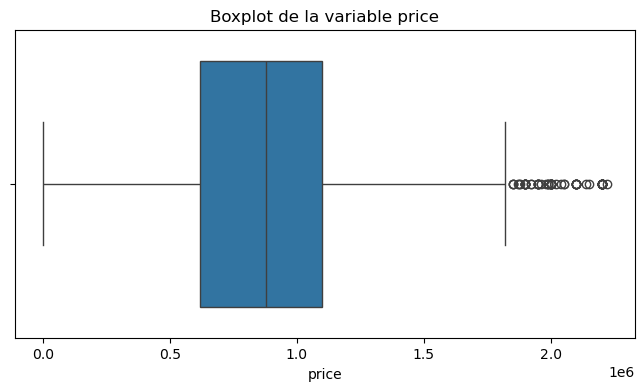

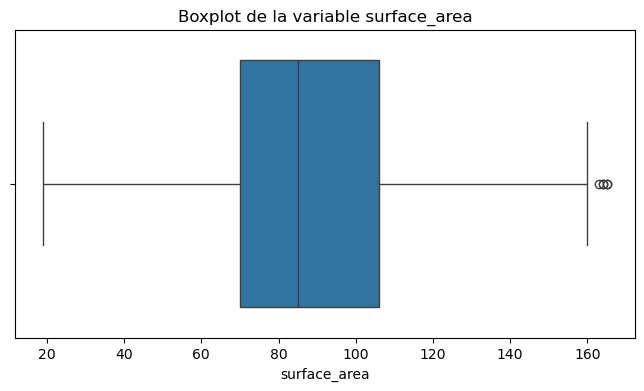

In [28]:

# ! price
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot de la variable price')
plt.show()


#! surface_area
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['surface_area'])
plt.title('Boxplot de la variable surface_area')
plt.show()


Encodage des variables catégorielles:



In [ ]:
from sklearn.preprocessing import LabelEncoder 


label_encoder = LabelEncoder()

df['city_name_encoded'] = label_encoder.fit_transform(df['city_name'])

print(df[['city_name', 'city_name_encoded']].head())


     city_name  city_name_encoded
1   Casablanca                 13
2  Dar Bouazza                 15
3   Casablanca                 13
6    Marrakech                 32
7   Casablanca                 13


In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


Normalisation avec MinMaxScaler

In [31]:
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [32]:
print(df[numeric_cols].head())


      price  salon  nb_rooms  nb_baths  surface_area  Ascenseur  Balcon  \
1  0.538281  0.125  0.333333  0.014925      0.541096        1.0     1.0   
2  0.608102  0.125  0.333333  0.014925      0.424658        1.0     1.0   
3  0.405396  0.125  0.000000  0.007463      0.253425        1.0     0.0   
6  0.342332  0.125  0.666667  0.022388      0.541096        1.0     1.0   
7  0.355846  0.125  0.666667  0.014925      0.369863        0.0     0.0   

   Chauffage  Climatisation  Concierge  Cuisine Équipée  Duplex  Meublé  \
1        1.0            1.0        0.0              1.0     0.0     0.0   
2        1.0            1.0        1.0              1.0     1.0     0.0   
3        1.0            1.0        0.0              1.0     0.0     1.0   
6        0.0            0.0        1.0              1.0     0.0     0.0   
7        0.0            0.0        0.0              1.0     0.0     0.0   

   Parking  Sécurité  Terrasse  
1      1.0       0.0       0.0  
2      1.0       1.0       1.0  

In [33]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df[numeric_cols])


         price     salon  nb_rooms  nb_baths  surface_area  Ascenseur  \
1     0.682633 -0.418933 -0.443266 -0.034817      0.352781   0.991811   
2     1.034746 -0.418933 -0.443266 -0.034817     -0.290656   0.991811   
3     0.012484 -0.418933 -2.212972 -0.170397     -1.236888   0.991811   
6    -0.305553 -0.418933  1.326440  0.100763      0.352781   0.991811   
7    -0.237402 -0.418933  1.326440 -0.034817     -0.593450  -1.008257   
...        ...       ...       ...       ...           ...        ...   
1767 -0.441855 -0.418933 -0.443266 -0.170397     -0.706998   0.991811   
1768 -0.032950 -0.418933 -0.443266 -0.034817     -1.009792   0.991811   
1769 -0.032950  1.606552 -0.443266 -0.034817      0.806972   0.991811   
1771 -0.441855 -0.418933 -0.443266 -0.034817     -0.177109  -1.008257   
1772  0.693992 -0.418933 -0.443266 -0.034817     -0.177109   0.991811   

        Balcon  Chauffage  Climatisation  Concierge  Cuisine Équipée  \
1     0.889093   2.264488       1.575557  -0.813917

In [34]:
print(df[numeric_cols].describe())


              price         salon      nb_rooms      nb_baths  surface_area  \
count  1.581000e+03  1.581000e+03  1.581000e+03  1.581000e+03  1.581000e+03   
mean   5.842540e-17  1.213451e-16  1.303336e-16 -1.348278e-17  2.337016e-16   
std    1.000316e+00  1.000316e+00  1.000316e+00  1.000316e+00  1.000316e+00   
min   -2.031961e+00 -2.444419e+00 -2.212972e+00 -3.059780e-01 -2.637310e+00   
25%   -6.235904e-01 -4.189334e-01 -4.432659e-01 -1.703975e-01 -7.069981e-01   
50%   -3.295001e-02 -4.189334e-01 -4.432659e-01 -3.481700e-02 -1.392594e-01   
75%    4.668226e-01 -4.189334e-01  1.326440e+00 -3.481700e-02  6.555748e-01   
max    3.011119e+00  1.375946e+01  3.096145e+00  1.786181e+01  2.888680e+00   

          Ascenseur        Balcon     Chauffage  Climatisation     Concierge  \
count  1.581000e+03  1.581000e+03  1.581000e+03   1.581000e+03  1.581000e+03   
mean  -3.145983e-17  3.145983e-17 -2.696557e-17  -3.145983e-17 -5.393114e-17   
std    1.000316e+00  1.000316e+00  1.000316e+00 

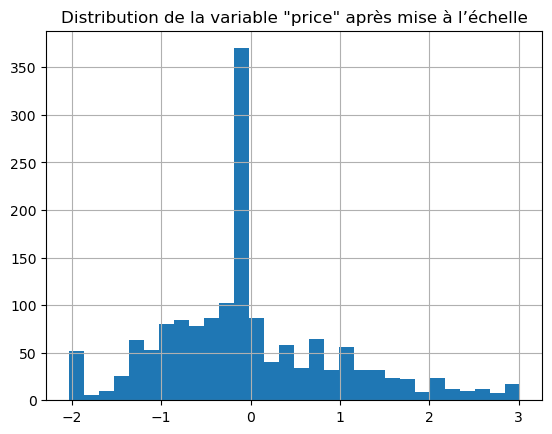

In [35]:
import matplotlib.pyplot as plt

df['price'].hist(bins=30)
plt.title('Distribution de la variable "price" après mise à l’échelle')
plt.show()


In [36]:
correlation_matrix = df.corr(numeric_only=True)


corr_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(corr_with_price)


price                1.000000
surface_area         0.461315
Ascenseur            0.312303
nb_rooms             0.246279
Parking              0.209979
Concierge            0.195889
Climatisation        0.193034
Terrasse             0.160061
salon                0.152094
Chauffage            0.147765
Sécurité             0.135682
Balcon               0.113884
Cuisine Équipée      0.108811
Meublé               0.044486
Duplex               0.031392
nb_baths             0.014559
city_name_encoded   -0.048018
Name: price, dtype: float64


In [37]:
selected_features = corr_with_price[corr_with_price > 0.15].index.tolist()

selected_features.remove('price')
print("Variables corrélées à 'price' :", selected_features)


Variables corrélées à 'price' : ['surface_area', 'Ascenseur', 'nb_rooms', 'Parking', 'Concierge', 'Climatisation', 'Terrasse', 'salon']


In [38]:
df[selected_features].corr()


,surface_area,Ascenseur,nb_rooms,Parking,Concierge,Climatisation,Terrasse,salon
surface_area,1.000000,0.171205,0.549371,0.136493,0.143470,0.093000,0.202853,0.337292
Ascenseur,0.171205,1.000000,0.052325,0.557274,0.520433,0.366664,0.323660,0.026022
nb_rooms,0.549371,0.052325,1.000000,0.053449,0.039328,-0.053725,0.046884,0.170258
Parking,0.136493,0.557274,0.053449,1.000000,0.558996,0.355166,0.339172,0.049816
Concierge,0.143470,0.520433,0.039328,0.558996,1.000000,0.422868,0.287138,0.093410
Climatisation,0.093000,0.366664,-0.053725,0.355166,0.422868,1.000000,0.242387,0.056912
Terrasse,0.202853,0.323660,0.046884,0.339172,0.287138,0.242387,1.000000,0.048683
salon,0.337292,0.026022,0.170258,0.049816,0.093410,0.056912,0.048683,1.000000


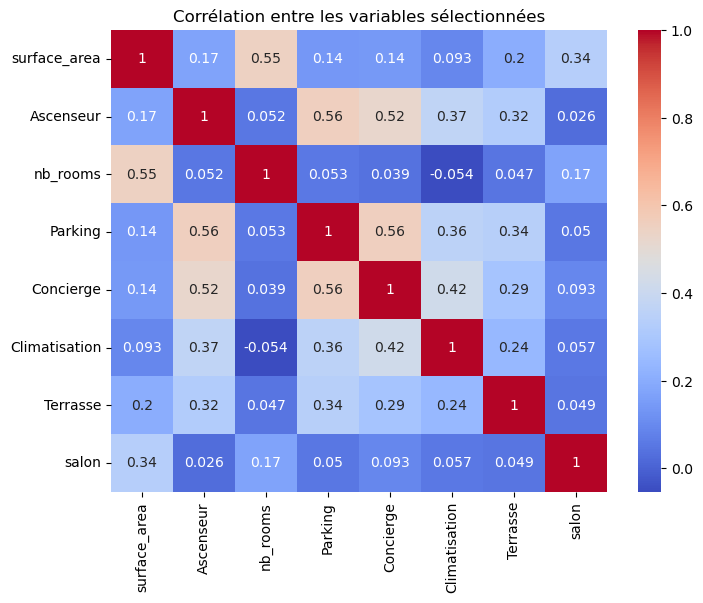

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables sélectionnées')
plt.show()

In [40]:
y = df['price']

In [41]:
X = df[selected_features]


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [43]:
print("Taille du X_train :", X_train.shape)
print("Taille du X_test  :", X_test.shape)
print("Taille du y_train :", y_train.shape)
print("Taille du y_test  :", y_test.shape)


Taille du X_train : (1264, 8)
Taille du X_test  : (317, 8)
Taille du y_train : (1264,)
Taille du y_test  : (317,)


## **Entraînement des modèles de régression**